## Video Search with V-Jepa 2 and LanceDB
V-Jepa 2 is a self-supervised video model designed to enhance AI's understanding, prediction, and planning capabilities in real-world environments. The model is initially pre-trained on over one million hours of internet video data using a mask-denoising technique in representation space, demonstrating state-of-the-art performance in video understanding and human action anticipation. Subsequently, an action-conditioned variant, V-JEPA 2-AC, is fine-tuned with a limited amount of robot interaction data, enabling zero-shot robotic planning for tasks like object manipulation. The research also highlights V-JEPA 2's effectiveness when integrated with a large language model for video question-answering tasks, achieving strong results

In [1]:
!!pip install -U "git+https://github.com/huggingface/transformers.git" torchcodec

['Collecting git+https://github.com/huggingface/transformers.git',
 '  Cloning https://github.com/huggingface/transformers.git to /var/tmp/pip-req-build-3wrxy83l',
 '  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /var/tmp/pip-req-build-3wrxy83l',
 '  Resolved https://github.com/huggingface/transformers.git to commit b949747b54b6d81c5e4ab93c4d98ebc7a5901b31',
 '  Installing build dependencies: started',
 "  Installing build dependencies: finished with status 'done'",
 '  Getting requirements to build wheel: started',
 "  Getting requirements to build wheel: finished with status 'done'",
 '  Preparing metadata (pyproject.toml): started',
 "  Preparing metadata (pyproject.toml): finished with status 'done'",
 'Requirement already satisfied: filelock in /opt/conda/lib/python3.10/site-packages (from transformers==4.53.0.dev0) (3.18.0)',
 'Requirement already satisfied: huggingface-hub<1.0,>=0.30.0 in /opt/conda/lib/python3.10/site-pack

In [2]:
!sudo apt-get install -y unrar-free


!wget --no-check-certificate https://www.crcv.ucf.edu/data/UCF101/UCF101.rar
!wget --no-check-certificate https://www.crcv.ucf.edu/data/UCF101/UCF101TrainTestSplits-RecognitionTask.zip
!unrar x -r UCF101.rar
!unzip UCF101TrainTestSplits-RecognitionTask.zip

--2025-06-19 09:24:46--  https://www.crcv.ucf.edu/data/UCF101/UCF101.rar
Resolving www.crcv.ucf.edu (www.crcv.ucf.edu)... 132.170.214.127
Connecting to www.crcv.ucf.edu (www.crcv.ucf.edu)|132.170.214.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6932971618 (6.5G) [application/x-rar-compressed]
Saving to: ‘UCF101.rar’

UCF101.rar          100%[===================>]   6.46G  78.8MB/s    in 84s     

2025-06-19 09:26:11 (78.5 MB/s) - ‘UCF101.rar’ saved [6932971618/6932971618]

--2025-06-19 09:26:11--  https://www.crcv.ucf.edu/data/UCF101/UCF101TrainTestSplits-RecognitionTask.zip
Resolving www.crcv.ucf.edu (www.crcv.ucf.edu)... 132.170.214.127
Connecting to www.crcv.ucf.edu (www.crcv.ucf.edu)|132.170.214.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113943 (111K) [application/zip]
Saving to: ‘UCF101TrainTestSplits-RecognitionTask.zip’

UCF101TrainTestSpli 100%[===================>] 111.27K  --.-KB/s    in 0.07s   

2025-06-19 

In [ ]:
!unrar x -mt -o+ UCF101.rar



Extracting  UCF-101/PoleVault/v_PoleVault_g25_c01.avi                 OK        
Extracting  UCF-101/PoleVault/v_PoleVault_g25_c02.avi                 OK        
Extracting  UCF-101/PoleVault/v_PoleVault_g25_c03.avi                 OK        
Extracting  UCF-101/PoleVault/v_PoleVault_g25_c04.avi                 OK        
Extracting  UCF-101/PoleVault/v_PoleVault_g25_c05.avi                 OK        
Extracting  UCF-101/PoleVault/v_PoleVault_g25_c06.avi                 OK        
Extracting  UCF-101/PoleVault/v_PoleVault_g25_c07.avi                 OK        
Extracting  UCF-101/PommelHorse/v_PommelHorse_g01_c01.avi             OK        
Extracting  UCF-101/PommelHorse/v_PommelHorse_g01_c02.avi             OK        
Extracting  UCF-101/PommelHorse/v_PommelHorse_g01_c03.avi             OK        
Extracting  UCF-101/PommelHorse/v_PommelHorse_g01_c04.avi             OK        
Extracting  UCF-101/PommelHorse/v_PommelHorse_g01_c05.avi             OK        
Extracting  UCF-101/PommelHo

In [18]:
!python get_frame_stats.py

Scanning folder: UCF-101
Processing 13320 video files...
  Processed 100/13320 files...
  Processed 200/13320 files...
  Processed 300/13320 files...
  Processed 400/13320 files...
  Processed 500/13320 files...
  Processed 600/13320 files...
  Processed 700/13320 files...
  Processed 800/13320 files...
  Processed 900/13320 files...
  Processed 1000/13320 files...
  Processed 1100/13320 files...
  Processed 1200/13320 files...
  Processed 1300/13320 files...
  Processed 1400/13320 files...
  Processed 1500/13320 files...
  Processed 1600/13320 files...
  Processed 1700/13320 files...
  Processed 1800/13320 files...
  Processed 1900/13320 files...
  Processed 2000/13320 files...
  Processed 2100/13320 files...
  Processed 2200/13320 files...
  Processed 2300/13320 files...
  Processed 2400/13320 files...
  Processed 2500/13320 files...
  Processed 2600/13320 files...
  Processed 2700/13320 files...
  Processed 2800/13320 files...
  Processed 2900/13320 files...
  Processed 3000/13320 f

In [29]:
!sudo apt install -y ffmpeg
!pip install -q torch==2.6.0 torchvision==0.21.0
!pip install -q torchcodec==0.2.1

import torch
print("Torch:", torch.__version__)
from torchcodec.decoders import VideoDecoder # validate it works

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  i965-va-driver intel-media-va-driver libaacs0 libaom0 libass9 libasyncns0
  libavc1394-0 libavcodec58 libavdevice58 libavfilter7 libavformat58
  libavresample4 libavutil56 libbdplus0 libbluray2 libbs2b0 libcaca0
  libcdio-cdda2 libcdio-paranoia2 libcdio19 libchromaprint1 libcodec2-0.9
  libdav1d4 libdc1394-25 libfftw3-double3 libflac8 libflite1 libgbm1 libgme0
  libgsm1 libiec61883-0 libigdgmm11 libjack-jackd2-0 liblilv-0-0 libmfx1
  libmp3lame0 libmpg123-0 libmysofa1 libnorm1 libogg0 libopenal-data
  libopenal1 libopenjp2-7 libopenmpt0 libopus0 libpgm-5.3-0 libpocketsphinx3
  libpostproc55 libpulse0 librabbitmq4 libraw1394-11 librubberband2
  libsamplerate0 libsdl2-2.0-0 libserd-0-0 libshine3 libsndfile1 libsndio7.0
  libsodium23 libsord-0-0 libsoxr0 libspeex1 libsphinxbase3 libsratom-0-0
  libsrt1.4-gnutls libssh-gcrypt-4 libswresampl

In [12]:
import cv2
import numpy as np
import os
from pathlib import Path
from torchcodec.decoders import VideoDecoder

import numpy as np

def extract_n_frames(video_path, n_frames):
    vr = VideoDecoder(video_path)
    total_frames = vr.metadata.num_frames_from_content

    extracted_frames = []
    
    # Initialize dimensions with defaults or based on metadata if video has no frames
    frame_height = vr.metadata.height if hasattr(vr.metadata, 'height') and vr.metadata.height is not None else 224
    frame_width = vr.metadata.width if hasattr(vr.metadata, 'width') and vr.metadata.width is not None else 224
    num_channels = 3 # Assuming RGB

    if total_frames > 0:
        num_frames_to_extract_from_video = min(n_frames, total_frames)

        if num_frames_to_extract_from_video == 1:
            frame_indices = [total_frames // 2]
        else:
            frame_indices = np.linspace(0, total_frames - 1, num_frames_to_extract_from_video, dtype=int).tolist()

        video_frames = vr.get_frames_at(indices=frame_indices).data
        extracted_frames.append(video_frames)

        # Update dimensions based on extracted video frames
        if video_frames.shape[0] > 0:
            frame_height, frame_width, num_channels = video_frames.shape[1:]

    current_extracted_count = sum([arr.shape[0] for arr in extracted_frames]) if extracted_frames else 0
    frames_to_add = n_frames - current_extracted_count

    if frames_to_add > 0:
        random_frames_list = []
        for _ in range(frames_to_add):
            random_rgb_content = np.random.randint(0, 256, size=(frame_height, frame_width, num_channels), dtype=np.uint8)
            random_frames_list.append(random_rgb_content)
        extracted_frames.append(np.array(random_frames_list))

    if extracted_frames:
        final_frames = np.concatenate(extracted_frames, axis=0)
    else:
        # If n_frames > 0 and no frames could be extracted or generated, raise error
        if n_frames > 0:
             raise ValueError("Could not extract or generate any frames, even with random content.")
        else: # n_frames == 0, return empty array
            return np.array([])
    
    return final_frames

In [13]:
import numpy as np
import pyarrow as pa
from pathlib import Path
import torch
import torch.nn as nn
from transformers import AutoVideoProcessor, AutoModel

model = AutoModel.from_pretrained("facebook/vjepa2-vitg-fpc64-384").to("cuda")
processor = AutoVideoProcessor.from_pretrained("facebook/vjepa2-vitg-fpc64-384")

# pooling layer (kernel_size=32, stride=32 for non-overlapping pooling)
max_pool_layer = nn.MaxPool2d(kernel_size=(32, 32), stride=(32, 32))

In [14]:
# Edit this to ingest only N number of videos. If None, all videos are ingested
MAX_VIDEOS_INGESTED = None
def ingest_video_folder(input_dir, n_frames, batch_size=32):
    video_extensions = {'.mp4', '.avi', '.mov', '.mkv', '.wmv', '.flv', '.webm', '.m4v', '.3gp'}
    
    input_path = Path(input_dir)
    if not input_path.exists():
        raise ValueError(f"Input directory does not exist: {input_dir}")
    
    video_files = []
    for file_path in input_path.rglob('*'):
        if file_path.is_file() and file_path.suffix.lower() in video_extensions:
            video_files.append(file_path)
            
    if not video_files:
        raise ValueError(f"No video files found in {input_dir}")
        
    print(f"Found {len(video_files)} video files")

    batch_videos_bytes = []
    batch_embeddings = []
    batch_parent_folders = []
    
    embedding_list_size = None
    embedding_value_type = pa.float32()
    if MAX_VIDEOS_INGESTED:
        video_files = video_files[:MAX_VIDEOS_INGESTED]
    for i, video_file in enumerate(video_files, 1):
        print(f"[{i}/{len(video_files)}] Processing: {video_file.name}")
        
        try:
            video_bytes = video_file.read_bytes()

            frames_array = extract_n_frames(
                str(video_file), 
                n_frames, 
            )
            with torch.no_grad():
                video = processor(frames_array, return_tensors="pt").to(model.device)
                video_embeddings = model.get_vision_features(**video)
            
            # Current shape: torch.Size([1, 5760, 1408])
            
            # Add a channel dimension to make it compatible with MaxPool2d (N, C, H, W)
            # Here, N=1 (re-added as batch), C=1 (single channel), H=5760, W=1408
            pooled_input = video_embeddings.unsqueeze(0) # Becomes [1, 1, 5760, 1408]
            
            pooled_embeddings = max_pool_layer(pooled_input)
            
            final_embedding = pooled_embeddings.flatten()
            
            embedding_flat_list = final_embedding.cpu().numpy().tolist()
            print(f"len {len(embedding_flat_list)}") 
            if embedding_list_size is None:
                embedding_list_size = len(embedding_flat_list)

            parent_folder = str(video_file.parent.name)

            batch_videos_bytes.append(video_bytes)
            batch_embeddings.append(embedding_flat_list)
            batch_parent_folders.append(parent_folder)

            if len(batch_videos_bytes) == batch_size:
                if embedding_list_size is None:
                    raise ValueError("Embedding list size could not be determined. Process at least one video successfully.")

                schema = pa.schema([
                    pa.field("video_bytes", pa.large_binary()),
                    pa.field("embeddings", pa.list_(pa.float32(),7920) ),
                    pa.field("task_type", pa.string())
                ])
                
                yield pa.RecordBatch.from_arrays([
                    pa.array(batch_videos_bytes, type=pa.large_binary()),
                    pa.FixedSizeListArray.from_arrays(
                        pa.array(sum(batch_embeddings, []), type=embedding_value_type), 
                        embedding_list_size
                    ),
                    pa.array(batch_parent_folders, type=pa.string())
                ], schema=schema)
                
                batch_videos_bytes = []
                batch_embeddings = []
                batch_parent_folders = []

        except Exception as e:
            print(f"Error processing {video_file.name}: {str(e)}")

    if batch_videos_bytes:
        if embedding_list_size is None:
            print("No videos processed successfully to determine embedding size for final batch.")
            return

        schema = pa.schema([
            pa.field("video_bytes", pa.large_binary()),
            pa.field("embeddings", pa.list_(pa.float32(),7920) ),
            pa.field("task_type", pa.string())
        ])

        yield pa.RecordBatch.from_arrays([
            pa.array(batch_videos_bytes, type=pa.large_binary()),
            pa.FixedSizeListArray.from_arrays(
                pa.array(sum(batch_embeddings, []), type=embedding_value_type), 
                embedding_list_size
            ),
            pa.array(batch_parent_folders, type=pa.string())
        ], schema=schema)

    print(f"Processing complete for all videos in {input_dir}")

In [3]:
import lancedb
import pyarrow as pa


schema = pa.schema([
    pa.field("video_bytes", pa.large_binary()),
    pa.field("embeddings", pa.list_(pa.float32(), 7920)),
    pa.field("task_type", pa.string())
])


In [4]:
# Use LanceDB local

db = lancedb.connect("videodb")

tbl = db.create_table("tbl", schema=schema, data=ingest_video_folder("UCF-101", 20), mode="overwrite")

In [ ]:
# Or use LanceDB cloud

db = lancedb.connect(
  uri="db://wikipedia-test",
  api_key="sk-...........====",
  region="us-east-1"
)

tbl = db.create_table("tbl", schema=schema)

#tbl.add(ingest_video_folder("UCF-101", 20))

In [7]:
tbl = db["tbl"]
tbl.count_rows()

13318

In [ ]:
# REPLACE WITH YOU TEST VIDEO PATH
video_path = "guitar.mp4"

In [2]:
from IPython.display import Video

Video("guitar.mp4")


In [26]:
import torch

def search_table(video_path, limit=1):
    frames = extract_n_frames(video_path, 20)
    with torch.no_grad():
        video = processor(frames, return_tensors="pt").to(model.device)
        video_embeddings = model.get_vision_features(**video)

    pooled_input = video_embeddings.unsqueeze(0) # Becomes [1, 1, 5760, 1408]

    pooled_embeddings = max_pool_layer(pooled_input)

    final_embedding = pooled_embeddings.flatten()

    embedding_flat_list = final_embedding.cpu().numpy().tolist()
    rs = tbl.search(embedding_flat_list).limit(limit).to_list()
    
    return rs

In [9]:
import cv2
import numpy as np
from IPython.display import display, HTML
import io
import base64
from PIL import Image

def display_video_frames_mosaic(video_bytes: bytes, num_frames: int = 5, frame_size: tuple = (160, 90)):
    """
    Extracts N frames from video data (bytes) and displays them as a mosaic in Jupyter.

    Args:
        video_bytes (bytes): The raw byte data of the video file.
        num_frames (int): The number of frames to extract and display in the mosaic.
        frame_size (tuple): Desired size (width, height) for each frame in the mosaic.
                            Smaller sizes are recommended for mosaics.
    """
    if not isinstance(video_bytes, bytes):
        raise TypeError("Input 'video_bytes' must be of type bytes.")
    if not isinstance(num_frames, int) or num_frames <= 0:
        raise ValueError("num_frames must be a positive integer.")
    if not isinstance(frame_size, tuple) or len(frame_size) != 2 or not all(isinstance(dim, int) and dim > 0 for dim in frame_size):
        raise ValueError("frame_size must be a tuple of two positive integers (width, height).")

    video_stream = io.BytesIO(video_bytes)

    temp_video_path = "temp_video_for_frame_extraction.avi"
    try:
        with open(temp_video_path, "wb") as f:
            f.write(video_bytes)

        cap = cv2.VideoCapture(temp_video_path)
        if not cap.isOpened():
            print(f"Error: Could not open video from temporary file: {temp_video_path}")
            return

        frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        if frame_count == 0:
            print("Error: No frames found in the video.")
            cap.release()
            return

        frames_to_extract = []
        if num_frames > frame_count:
            print(f"Warning: num_frames ({num_frames}) is greater than actual frame count ({frame_count}). Extracting all available frames.")
            indices = list(range(frame_count))
        else:
            # Distribute frame extraction evenly
            indices = np.linspace(0, frame_count - 1, num_frames, dtype=int)

        for i in indices:
            cap.set(cv2.CAP_PROP_POS_FRAMES, i)
            ret, frame = cap.read()
            if ret:
                # Convert BGR to RGB (OpenCV reads in BGR, PIL/Jupyter expects RGB)
                frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                frame_resized = cv2.resize(frame_rgb, frame_size, interpolation=cv2.INTER_AREA)
                frames_to_extract.append(frame_resized)
            else:
                print(f"Warning: Could not read frame at index {i}.")

        cap.release()

        if not frames_to_extract:
            print("No frames were extracted.")
            return

        grid_cols = int(np.ceil(np.sqrt(len(frames_to_extract))))
        grid_rows = int(np.ceil(len(frames_to_extract) / grid_cols))

        # Calculate total mosaic size
        mosaic_width = grid_cols * frame_size[0]
        mosaic_height = grid_rows * frame_size[1]
        
        mosaic_image = Image.new('RGB', (mosaic_width, mosaic_height))

        for i, frame_data in enumerate(frames_to_extract):
            row = i // grid_cols
            col = i % grid_cols
            x_offset = col * frame_size[0]
            y_offset = row * frame_size[1]
            
            pil_frame = Image.fromarray(frame_data)
            mosaic_image.paste(pil_frame, (x_offset, y_offset))

        # Convert the mosaic image to a base64 string for display
        buffered = io.BytesIO()
        mosaic_image.save(buffered, format="PNG")
        img_str = base64.b64encode(buffered.getvalue()).decode()

        # Display the mosaic using HTML
        html_output = f'<img src="data:image/png;base64,{img_str}" alt="Video Frame Mosaic" style="border: 1px solid #ddd; max-width: 100%; height: auto;">'
        display(HTML(html_output))

    finally:
        # Clean up the temporary file
        if os.path.exists(temp_video_path):
            os.remove(temp_video_path)


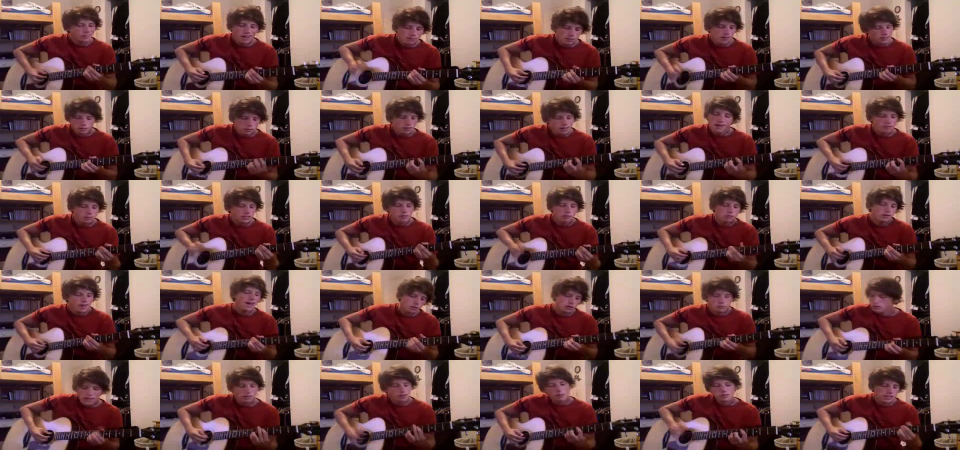

In [15]:
rs = search_table("guitar.mp4")
display_video_frames_mosaic(rs[0]["video_bytes"], 30)

In [25]:
# External video
Video("teaching.mp4")


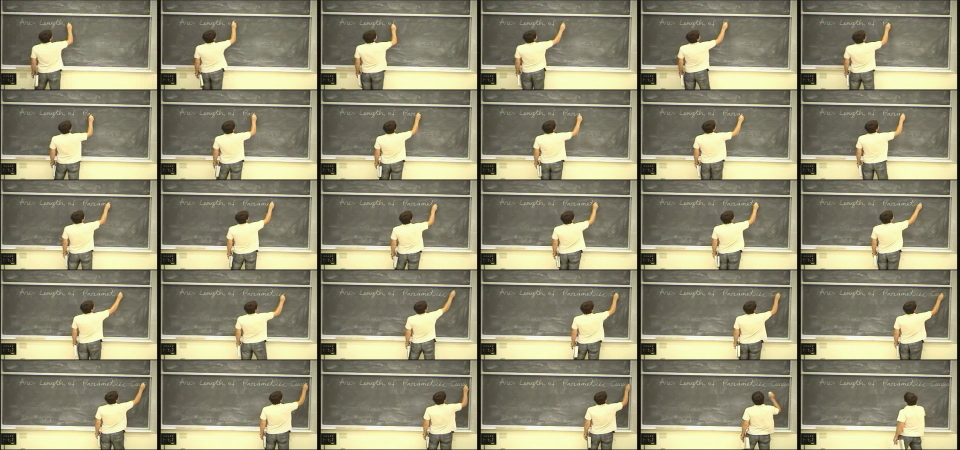

In [33]:
rs = search_table("teaching.mp4", 5)
display_video_frames_mosaic(rs[0]["video_bytes"], 30)


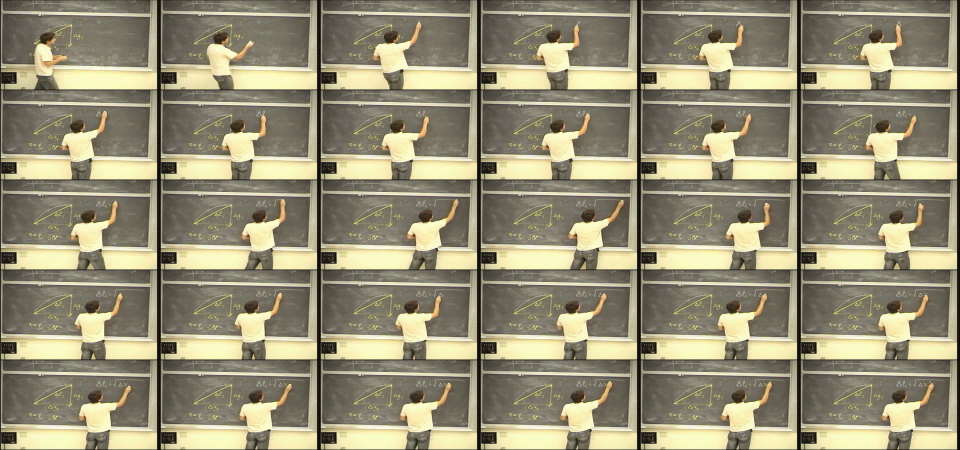

In [35]:
display_video_frames_mosaic(rs[4]["video_bytes"], 30)